In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor

In [2]:
df=pd.read_csv("adult (hw2).csv")
dt=pd.read_csv("adult_test (hw2).csv")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
dt

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [5]:
dt.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
dt.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [8]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [9]:
dt.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [10]:
df.apply(lambda x:np.sum(x==' ?'))

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [11]:
dt.apply(lambda x:np.sum(x==' ?'))

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
salary              0
dtype: int64

In [12]:
fliter1 = (df["native-country"] != ' ?')
fliter2 = (df["occupation"] != ' ?')
fliter3 = (df["workclass"] != ' ?')
df_1 = df[fliter1 & fliter2 & fliter3]
print(df_1['native-country'].value_counts())
print(df_1['occupation'].value_counts())
print(df_1['workclass'].value_counts())

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [13]:
fliter1 = (dt["native-country"] != ' ?')
fliter2 = (dt["occupation"] != ' ?')
fliter3 = (dt["workclass"] != ' ?')
dt_1 = dt[fliter1 & fliter2 & fliter3]
print(dt_1['native-country'].value_counts())
print(dt_1['occupation'].value_counts())
print(dt_1['workclass'].value_counts())

 United-States                 13788
 Mexico                          293
 Philippines                      95
 Puerto-Rico                      66
 Germany                          65
 Canada                           56
 El-Salvador                      47
 India                            47
 China                            45
 Cuba                             41
 England                          33
 Italy                            32
 South                            30
 Dominican-Republic               30
 Japan                            30
 Portugal                         28
 Haiti                            27
 Columbia                         26
 Poland                           25
 Guatemala                        23
 Jamaica                          23
 Greece                           20
 Vietnam                          19
 Ecuador                          16
 Nicaragua                        15
 Peru                             15
 Iran                             14
 

In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_2= df_1
df_2['workclass'] = labelencoder.fit_transform(df_1['workclass'])
df_2['education']=labelencoder.fit_transform(df_1['education'])
df_2['occupation'] = labelencoder.fit_transform(df_1['occupation'])
df_2['marital-status'] = labelencoder.fit_transform(df_1['marital-status'])
df_2['relationship'] = labelencoder.fit_transform(df_1['relationship'])
df_2['race'] = labelencoder.fit_transform(df_1['race'])
df_2['sex'] = labelencoder.fit_transform(df_1['sex'])
df_2['native-country'] = labelencoder.fit_transform(df_1['native-country'])
df_2['salary'] = labelencoder.fit_transform(df_1['salary'])
df_2

C:\Users\BOB\AppData\Local\Temp\ipykernel_10028\4068754672.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['workclass'] = labelencoder.fit_transform(df_1['workclass'])
C:\Users\BOB\AppData\Local\Temp\ipykernel_10028\4068754672.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['education']=labelencoder.fit_transform(df_1['education'])
C:\Users\BOB\AppData\Local\Temp\ipykernel_10028\4068754672.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dt_2= dt_1
dt_2['workclass'] = labelencoder.fit_transform(dt_1['workclass'])
dt_2['education']=labelencoder.fit_transform(dt_1['education'])
dt_2['occupation'] = labelencoder.fit_transform(dt_1['occupation'])
dt_2['marital-status'] = labelencoder.fit_transform(dt_1['marital-status'])
dt_2['relationship'] = labelencoder.fit_transform(dt_1['relationship'])
dt_2['race'] = labelencoder.fit_transform(dt_1['race'])
dt_2['sex'] = labelencoder.fit_transform(dt_1['sex'])
dt_2['native-country'] = labelencoder.fit_transform(dt_1['native-country'])
dt_2['salary'] = labelencoder.fit_transform(dt_1['salary'])
dt_2

C:\Users\BOB\AppData\Local\Temp\ipykernel_10028\2358533984.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_2['workclass'] = labelencoder.fit_transform(dt_1['workclass'])
C:\Users\BOB\AppData\Local\Temp\ipykernel_10028\2358533984.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_2['education']=labelencoder.fit_transform(dt_1['education'])
C:\Users\BOB\AppData\Local\Temp\ipykernel_10028\2358533984.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,37,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,2,245211,9,13,4,9,3,4,1,0,0,40,37,0
16276,39,2,215419,9,13,0,9,1,4,0,0,0,36,37,0
16278,38,2,374983,9,13,2,9,0,4,1,0,0,50,37,0
16279,44,2,83891,9,13,0,0,3,1,1,5455,0,40,37,0


In [16]:
x_train=df_2.drop('hours-per-week',axis=1)
y_train=df_2['hours-per-week']

In [17]:
print('Train data shape {} {}'.format(x_train.shape, y_train.shape))

Train data shape (30162, 14) (30162,)


In [18]:
xg=XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.3)
xg.fit(x_train,y_train)

[15:39:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

In [19]:
y_train.pred=xg.predict(x_train)

In [20]:
print('R^2 Training Score: {:.2f}'.format(xg.score(x_train, y_train)))

R^2 Training Score: 0.40


In [21]:
from sklearn.metrics import mean_absolute_error
print('MAE',mean_absolute_error(y_train,y_train.pred))

MAE 6.343881294333834


In [22]:
from sklearn.metrics import mean_squared_error
print('RMSE',np.sqrt(mean_squared_error(y_train,y_train.pred)))

RMSE 9.268565581457409


In [23]:
from sklearn.metrics import mean_absolute_percentage_error
print('MAPE',mean_absolute_percentage_error(y_train,y_train.pred))

MAPE 0.22430852613343435


[15:39:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


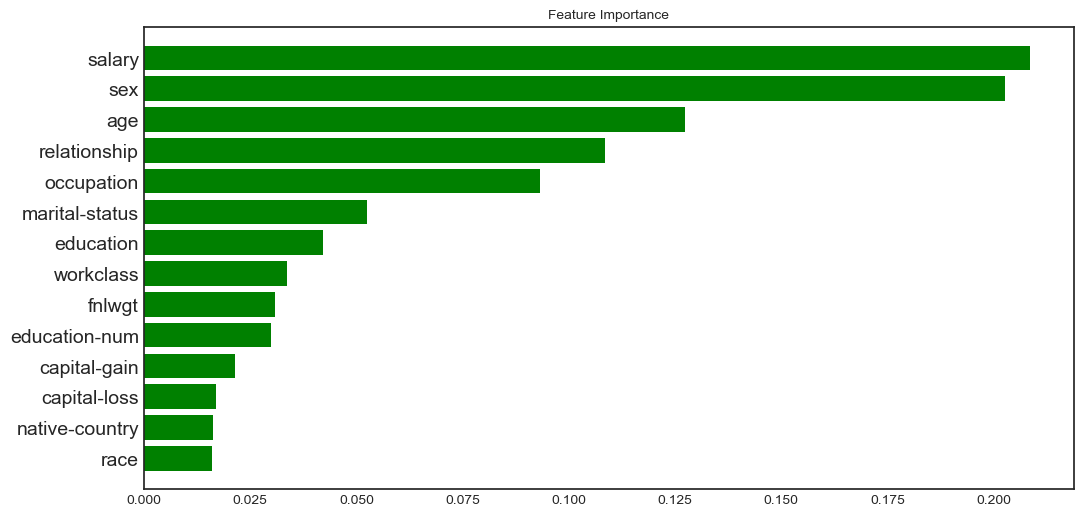

In [24]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

xg=XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.3)
xg.fit(x_train,y_train)
importances = xg.feature_importances_
feature_names = df_2.drop('hours-per-week', axis=1).columns
indices = np.argsort(importances)

def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    plt.title("Feature Importance", fontsize=10)
    plt.barh(range(len(indices)), importances[indices], color='g',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    
feature_importance_graph(indices, importances, feature_names)
plt.show()

In [25]:
print('Train data shape {} {}'.format(x_train.shape, y_train.shape))

Train data shape (30162, 14) (30162,)


In [26]:
data3=df_2.drop(columns=['capital-loss',"race",'native-country',"capital-gain",'marital-status','relationship','workclass','education','education-num','fnlwgt','occupation'])#留下前三

In [27]:
data3.dtypes

age               int64
sex               int32
hours-per-week    int64
salary            int32
dtype: object

In [28]:
print(data3.shape)

(30162, 4)


In [29]:
x2_train=data3.drop('hours-per-week',axis=1)
y2_train=data3['hours-per-week']

In [30]:
xg2=XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.3)
xg2.fit(x2_train,y2_train)

[15:39:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

In [31]:
y2_train.pred=xg2.predict(x2_train)

In [32]:
print('R^2 Training Score: {:.2f}'.format(xg2.score(x2_train, y2_train)))

R^2 Training Score: 0.20


In [33]:
print('MAE',mean_absolute_error(y2_train,y2_train.pred))
print('RMSE',np.sqrt(mean_squared_error(y2_train,y2_train.pred)))
print('MAPE',mean_absolute_percentage_error(y2_train,y2_train.pred))

MAE 7.362801195795613
RMSE 10.694372344014665
MAPE 0.2663552233940787
